# Proyecto: Generación de Datos Simulados para Seguros de Automóviles

En esta tarea, se espera que apliquen los conocimientos adquiridos durante el curso para realizar un análisis completo de un conjunto de datos simulados de una aseguradora de coches enfocada en el servicio público, y posteriormente, desarrollen y desplieguen un modelo predictivo utilizando la plataforma Streamlit.


## Descripción del Proyecto:
El proyecto se divide en dos partes principales:
1.	Análisis de Datos:

    * Generación de un conjunto de datos simulados que incluya información sobre pólizas de seguro, siniestros, tipo de cobertura, modelo del coche, entre otros.

    * Exploración y análisis de los datos utilizando técnicas como visualizaciones, análisis estadístico y correlaciones.

    * Aplicación de al menos seis análisis diferentes, incluyendo distribución de montos de reclamo, relación entre variables, análisis de tendencias y correlaciones.

2.	Desarrollo y Despliegue de Modelo Predictivo:
    
    * Selección de un modelo de Machine Learning adecuado para predecir alguna variable relevante basada en el conjunto de datos analizado.

    * Entrenamiento del modelo seleccionado utilizando técnicas de validación cruzada y ajuste de hiperparámetros si es necesario.

    * Desarrollo de una aplicación web utilizando Streamlit que permita a los usuarios introducir datos y obtener predicciones del modelo en tiempo real.

    * Despliegue de la aplicación en un entorno accesible para su uso.


Variables Generadas:

    Número de póliza: Se asigna un identificador único a cada póliza de seguro generado. El número de póliza sigue el formato "PXXXXX", donde "XXXXX" es un número único rellenado con ceros a la izquierda para mantener una longitud constante de cinco dígitos.

    Fechas de inicio y vencimiento: Se generan fechas de inicio y vencimiento aleatorias dentro del rango de tiempo comprendido entre el 1 de enero de 2022 y el 31 de diciembre de 2025.

    Tipo de cobertura: Se asigna aleatoriamente uno de los siguientes tipos de cobertura a cada póliza de seguro: responsabilidad civil, cobertura total, cobertura de colisión, cobertura amplia y cobertura de robo.

    Modelo del coche: Se elige aleatoriamente un modelo de automóvil de una lista predefinida que incluye marcas como Toyota Corolla, Honda Civic, Ford Focus, Chevrolet Cruze y Nissan Sentra. Las probabilidades de selección están predefinidas para cada modelo.

    Año del coche: Se genera aleatoriamente el año de fabricación del automóvil asegurado, variando entre 2010 y 2022.

    Valor asegurado: Se asigna un valor asegurado aleatorio entre $10,000 y $50,000 para cada póliza de seguro.

    Deducible: Se elige aleatoriamente un deducible de $500, $600 o $700 para cada póliza de seguro.

    Estado del seguro: Se asigna aleatoriamente el estado del seguro como "Al día" o "Vencido" para cada póliza.

    Gastos médicos y Daños a terceros: Se generan aleatoriamente valores binarios (0 o 1) para indicar la presencia o ausencia de siniestros relacionados con gastos médicos y daños a terceros, respectivamente.

Pasos a Seguir:
1.	Generación de Datos Simulados: Utilicen el siguiente código Python para generar un conjunto de datos simulados que represente la actividad de una aseguradora de coches:

Asegúrense de incluir todas las variables solicitadas y generar al menos 10,000 casos diferentes.

In [ ]:
import pandas as pd
def generate_random_date(start_date, end_date):
    rng = np.random.default_rng()
    days_difference = ( datetime.datetime.strptime(end_date, '%d/%m/%Y').date()  - datetime.datetime.strptime(start_date, '%d/%m/%Y').date() ).days
    random_days = rng.integers(days_difference)
    return datetime.datetime.strptime(start_date, '%d/%m/%Y').date() + datetime.timedelta(days=int(random_days))


In [ ]:
import pandas as pd
import numpy as np
import datetime
import random

# Función para generar fechas aleatorias dentro de un rango
def generate_random_date(start_date, end_date):
    rng = np.random.default_rng()
    days_difference = ( datetime.datetime.strptime(end_date, '%d/%m/%Y').date()  - datetime.datetime.strptime(start_date, '%d/%m/%Y').date() ).days
    random_days = rng.integers(days_difference)
    return datetime.datetime.strptime(start_date, '%d/%m/%Y').date() + datetime.timedelta(days=int(random_days))

# Semilla para reproducibilidad
np.random.seed(42)

# Generar 10,000 casos simulados
n_cases = 10000

# Fechas de inicio y vencimiento de la cobertura desde 2022 a 2025
start_date_coverage = '1/1/2022'
end_date_coverage = '31/12/2025'

# Tipos de cobertura
coverage_types = ['Responsabilidad civil', 'Cobertura total', 'Cobertura de colisión', 'Cobertura amplia', 'Cobertura de robo']

# Modelos de coches y probabilidades de ocurrencia
car_models = ['Toyota Corolla', 'Honda Civic', 'Ford Focus', 'Chevrolet Cruze', 'Nissan Sentra',
              'Hyundai Elantra', 'Volkswagen Jetta', 'Kia Forte', 'Mazda 3', 'Subaru Impreza']

probabilities = [0.2, 0.15, 0.12, 0.1, 0.08, 0.1, 0.08, 0.07, 0.05, 0.05]

# Generar datos simulados
# Generar datos simulados
data = {
    'Número de póliza': ['P' + '0' * ( 5 - len(str(_) ) ) + str(_) for _ in range(1,n_cases+1)],
    'Fecha de inicio': [generate_random_date(start_date_coverage, end_date_coverage) for _ in range(n_cases)],
    'Tipo de cobertura': np.random.choice(coverage_types, n_cases),
    'Modelo del coche': np.random.choice(car_models, n_cases, p=probabilities),
    'Año del coche': np.random.choice(range(2010,2023), n_cases),
    'Valor asegurado': np.random.randint(10000, 50000, n_cases),
    'Deducible': np.random.choice([500, 600, 700], n_cases),
    'Estado del seguro': np.random.choice(["Al día", "Vencido"], n_cases, p=[0.65, 0.35]),
    'Gastos médicos': np.random.choice([0, 1], n_cases, p=[0.45, 0.55]),
    'Daños a terceros': np.random.choice([0, 1], n_cases, p=[0.75, 0.25])
}

data['Fecha de vencimiento'] = [generate_random_date(data['Fecha de inicio'][_].strftime('%d/%m/%Y'), end_date_coverage) for _ in range(n_cases)]

# Crear DataFrame
df = pd.DataFrame(data)

# Mostrar el DataFrame
df.head(3)

,Número de póliza,Fecha de inicio,Tipo de cobertura,Modelo del coche,Año del coche,Valor asegurado,Deducible,Estado del seguro,Gastos médicos,Daños a terceros,Fecha de vencimiento
0,P00001,2022-09-27,Cobertura amplia,Toyota Corolla,2016,30989,500,Al día,1,0,2025-04-18
1,P00002,2024-08-16,Cobertura de robo,Kia Forte,2019,13162,600,Vencido,1,0,2025-03-30
2,P00003,2022-07-14,Cobertura de colisión,Honda Civic,2022,12752,600,Al día,0,1,2022-11-17


2. Análisis de Datos: Realicen al menos seis análisis diferentes utilizando técnicas de visualización y estadística descriptiva. Por ejemplo, pueden explorar la distribución de los montos de reclamo, la relación entre variables, la cantidad de siniestros por tipo de coche o mes, entre otros.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Número de póliza      10000 non-null  object
 1   Fecha de inicio       10000 non-null  object
 2   Tipo de cobertura     10000 non-null  object
 3   Modelo del coche      10000 non-null  object
 4   Año del coche         10000 non-null  int64 
 5   Valor asegurado       10000 non-null  int64 
 6   Deducible             10000 non-null  int64 
 7   Estado del seguro     10000 non-null  object
 8   Gastos médicos        10000 non-null  int64 
 9   Daños a terceros      10000 non-null  int64 
 10  Fecha de vencimiento  10000 non-null  object
dtypes: int64(5), object(6)
memory usage: 859.5+ KB


Tipos de coches con más siniestros
Modelo del coche
Toyota Corolla      1971
Honda Civic         1508
Ford Focus          1223
Chevrolet Cruze     1035
Hyundai Elantra      969
Volkswagen Jetta     803
Nissan Sentra        778
Kia Forte            724
Mazda 3              501
Subaru Impreza       488
Name: count, dtype: int64



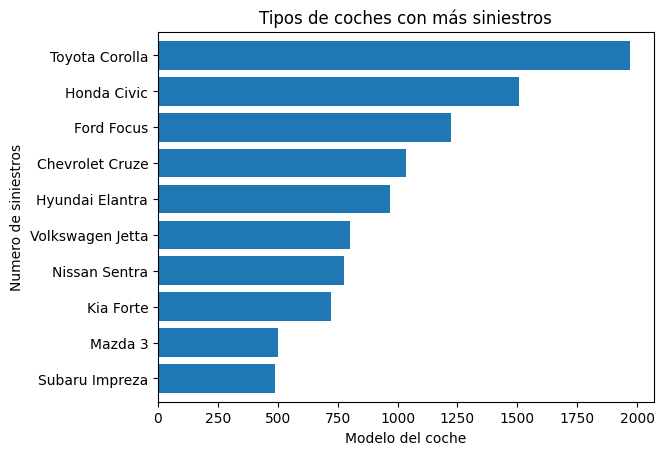

Fechas con más siniestros
Mes de inicio
1     875
2     785
3     852
4     830
5     878
6     772
7     833
8     794
9     855
10    878
11    782
12    866
Name: count, dtype: int64

Fechas con más siniestros


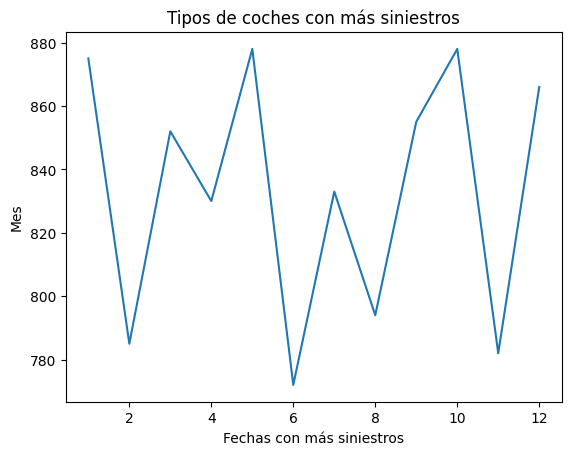

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Análisis: Tipos de coches con más siniestros
print('Tipos de coches con más siniestros')
top_coches_siniestrados = df['Modelo del coche'].value_counts()
print( top_coches_siniestrados )
print( "" )
# Gráfico: Tipos de coches con más siniestros
top_coches_siniestrados.sort_values(ascending=True).plot(kind='barh', title='Tipos de coches con más siniestros', xlabel='Modelo del coche', ylabel='Numero de siniestros', width=0.8)
plt.show()
# Análisis: Fechas con más siniestros
print('Fechas con más siniestros')
df_copia = df.copy()
df_copia['Mes de inicio'] = df_copia['Fecha de inicio'].apply(lambda x: int(x.strftime('%m')))
top_fechas_siniestros = df_copia['Mes de inicio'].value_counts().sort_index()
print( top_fechas_siniestros )
print("")

# Gráfico: Fechas con más siniestros
print('Fechas con más siniestros')
top_fechas_siniestros.plot(kind='line', title='Tipos de coches con más siniestros', xlabel='Fechas con más siniestros', ylabel='Mes')
plt.show()

3. Desarrollo del Modelo Predictivo: Elijan un modelo de Machine Learning adecuado para predecir alguna variable relevante en función del conjunto de datos generado. Por ejemplo, pueden predecir el monto del reclamo, el tipo de siniestro o la probabilidad de siniestros.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Codificación de variables categóricas
df_encoded = pd.get_dummies(df.drop(['Número de póliza', 'Fecha de inicio', 'Fecha de vencimiento'], axis=1))

# División de datos en entrenamiento y prueba
X = df_encoded.drop('Gastos médicos', axis=1)
y = df_encoded['Gastos médicos']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluación del modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo: {accuracy:.2f}")


Precisión del modelo: 0.52


4. Despliegue de la Aplicación en Streamlit: Desarrollen una aplicación web utilizando Streamlit que permita a los usuarios interactuar con el modelo predictivo y obtener predicciones en tiempo real. Asegúrense de que la aplicación sea intuitiva y fácil de usar.

# Entrega del Proyecto:

La entrega del proyecto se realizará en dos etapas:
1.	Informe Escrito: Presenten un informe escrito que incluya una descripción detallada de cada paso realizado, los resultados obtenidos en el análisis de datos, la elección y evaluación del modelo predictivo, y una guía de usuario para la aplicación desarrollada en Streamlit.

2.	Código y Archivos de la Aplicación: Adjunten el código Python utilizado para generar los datos simulados, realizar el análisis de datos, entrenar el modelo predictivo y desarrollar la aplicación en Streamlit. Además, proporcionen los archivos necesarios para ejecutar la aplicación de manera local o el enlace al entorno en el que está desplegada.

Fecha de Entrega: La fecha límite para la entrega del proyecto es el [28 de abril]. Por favor, asegúrense de cumplir con todos los requisitos y de proporcionar una presentación clara y organizada de su trabajo.

Esperamos ver sus proyectos finales y estamos disponibles para cualquier pregunta o aclaración adicional que puedan necesitar.
